<a href="https://colab.research.google.com/github/soaressc/evg_python/blob/main/evg_python_aula05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5: Uses and Applications of Libraries

Learning Objectives:



1.   Apply the Math library to solve computation problems.
2.   Apply the Numpy, Scipy, Matplotlib libraries for data analysis and graph generation.
3.   Apply the Flask framework for web development and understand the relationship with HTML.

##5.1: Math

Common mathematical functions, such as absolute value, exponential, or log, are defined within the Math library.

Additional functions and spec of the Math Library can be found in https://docs.python.org/3/library/math.html

Take below for examples of how to use the Math library.

In [2]:
import math

# Power function
print("2^5 = " + str(math.pow(2,5)))

2^5 = 32.0


In [3]:
# Ceiling function
print(math.ceil(3.45))

print(math.ceil(10.01))

4
11


In [4]:
# Floor function
print(math.floor(5.25))

print(math.floor(11.01))

5
11


In [5]:
# Absolute Value
print(math.fabs(-10.33))

print(math.fabs(5.25))

10.33
5.25


In [6]:
# Log with base e, or natural log
print(math.log(1000))

6.907755278982137


In [7]:
# Log with a specified base of 10
print(math.log(1000,10))

2.9999999999999996


##5.2: Data Analysis with Numpy, Matplotlib, Scipy

Numpy is a package for numeric computing in python.

*   It provides an efficient data structure for numeric, n-dimensional arrays (ndarray)
*   Supports vector and matrix operations.
*   Numpy is implemented in C, so it is really fast and efficient.

The basic data type in numpy is the numpy n-dimensional array. These can be used to represent vectors (1D) matrices (2D) or tensors (nD).

*   1 dimensions numpy arrays are often used to represent a series of data.
*   n-dimensional arrays often represent complete data sets (each column is a type of measurement).

  Numpy arrays are very similar to Python lists. Indexing and slicing works the same way (including assingments). **However**, all cells in the same array must contain the same data type.

Operators don't work the same for lists and arrays and there are many additional methods defined on them.

Referenced from *Columbia University CS Professor Daniel Bauer ENGI1006 Lecture*


In [8]:
# Let's see what happen if we use a list to represent a vector?
[1,2,3] * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [9]:
# Previous was NOT the expected output with vector multiplication by a scalar

# Need to do this
[i*3 for i in [1,2,3]]

[3, 6, 9]

In [10]:
# What about summing two vectors?

# Treated as list concatenation
[1,2,3]+[4,5,6]

[1, 2, 3, 4, 5, 6]

In [11]:
# Sum two vectors
a = [1,2,3]
b = [4,5,6]
[a[i] + b[i] for i in range(len(a))]

[5, 7, 9]

In [12]:
# cross product or dot product?
[1,2,3] * [4,5,6]

TypeError: ignored

In [14]:
# We could compute the dot product like this:

u = [1,2,3]
v = [4,5,6]

total = 0
for i in range(len(u)):
    total += u[i] * v[i]
total

32

In [15]:
# Let's see what happens if we use Numpy

# np is a common convention to refer to numpy throughout the code
import numpy as np

u = np.array([1,2,3])
v = np.array([4,5,6])

# dot() calculates the dot product of two vectors
np.dot(u,v)


32

In [16]:
type(u)

numpy.ndarray

In [17]:
# Some more operations on 1D-arrays:

import numpy as np

u = np.array([1,2,3])
v = np.array([4,5,6])

print("Vector addition with another vector ---> " + str(u+v))
print("Vector addition with a scalar ---> " + str(u+4))
print("Vector multiplication by a scalar ---> " + str(u * 4))
print("Vector multiplication (NOT dot nor cross product) ---> " + str(u * v))
print("Vector sum ---> " + str(np.sum(u * v)))
print("Dot product ---> " + str(np.dot(u,v)))

Vector addition with another vector ---> [5 7 9]
Vector addition with a scalar ---> [5 6 7]
Vector multiplication by a scalar ---> [ 4  8 12]
Vector multiplication (NOT dot nor cross product) ---> [ 4 10 18]
Vector sum ---> 32
Dot product ---> 32


In [18]:
"""
Let's look at multi-dimensional arrays: 'arrays within arrays'

The following code creates a total of three 3*3 matrices with all ones
"""
u = np.ones((3,3,3))
u

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [19]:
# Return the shape/dimension of array
u.shape

(3, 3, 3)

In [20]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [21]:
np.ones((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])


**Scipy** is a package to analyze the curve fit.

**Matplotlib** is a package for graphing data.

See the follow for an example of how scipy, numpy, and matplotlib could be used together in data analysis.

Documentations for Scipy, Matplotlib, and Numpy can be access in https://docs.scipy.org/doc/scipy/

estimated B for each error 

4.0+-0.2: 1.31+-0.03
3.5+-0.2: 1.14+-0.02
3.0+-0.2: 0.97+-0.04
2.5+-0.2: 0.81+-0.02
2.0+-0.2: 0.76+-0.05

 Estimated parameters of m and b:  [0.286 0.14 ]

 Estimated variance of m & b:  [0.02778489 0.08563877]


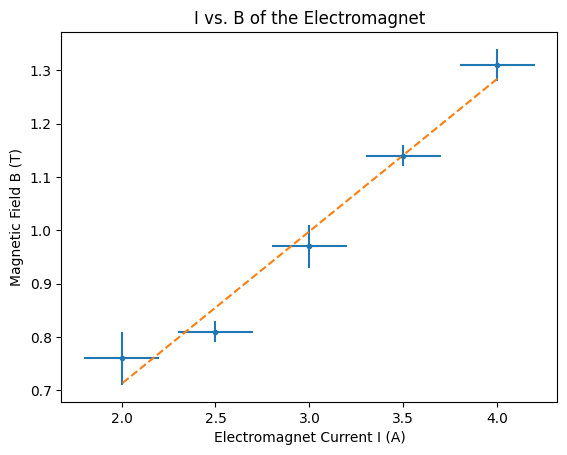

In [22]:
# import different packages used for data analysis
# .. "as opt" means that the programmer could use the shorthand of "opt" to refer to this library, instead of typing the entire name
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt


# Raw data manually entered by user
I =[4.0, 3.5, 3.0, 2.5, 2.0]
B =[1.31, 1.14, 0.97 ,0.81, 0.76]
IError = [0.2, 0.2, 0.2, 0.2, 0.2]
BError = [0.03, 0.02, 0.04, 0.02, 0.05]

print("estimated B for each error \n")
for i in range (5) :
  print(str(I[i]) + "+-" + str(IError[i]) + ": " + str(B[i]) + "+-" + str(BError[i]))

# Apply Numpy library to format the list of raw data into a multi-dimensional matrix
# This is necessary for function optimization and in order to properly use the Scipy package
xdata = np.array(I)
ydata = np.array(B)
xerror = np.array(IError)
yerror= np.array(BError)

# Define linear function for fitting,
def func(h, m, b):
    return m*h + b


# w gives the estimated parameter for m and b, stored in the square matrix of w and u
# the missing _ return info about variance and covariance

# w is a matrix with information about the value of slope and y-intercept
w, u = opt.curve_fit(func, xdata, ydata)

# Apply x coordinates and optimized result about curve fit to find the "Line of the Best Fit"
yfit = func(xdata,*w)

# Use Matplotlib package to graph data
  # 1. Graph the error bars for each x-value
  # 2. Graph the "Line of the Best Fit"

# Note: there are options to customize the look of your graph with different parameters
plt.errorbar(I, B, xerr=IError, yerr = BError, fmt='o', ms = 3)
plt.plot(xdata,yfit,label="Fit", linewidth=1.5, linestyle='dashed')

# Add title and labels to the graph
plt.title('I vs. B of the Electromagnet')
plt.xlabel('Electromagnet Current I (A)')
plt.ylabel('Magnetic Field B (T)')


print("\n Estimated parameters of m and b: ", w)
print("\n Estimated variance of m & b: ", np.sqrt(np.diag(u)))

# If necessary, this is how you could save the graph to your local machine.
# But here we do NOT need to save the graph, so we will comment out this line.

# Specify the image name as the parameter
### plt.savefig('IvsB.jpg')

# Note: if you are showing and storing the graph, make sure you SAVE before SHOW.
plt.show()

##5.3: Web Development with Flask

**Flask** is a Python framework for building a web application.

Watch this Intro to Flask video for How-To build a basic website with Flask. https://www.youtube.com/watch?v=mqhxxeeTbu0&list=PLzMcBGfZo4-n4vJJybUVV3Un_NFS5EOgX

In [ ]:
"""
app.route defines the URL and what function to run for each URL.

When only '/' is specified in the URL, it is assumed to be the home page.
This web application will serve the text '<h1>WELCOME to My Home Page</h1>'
in header 1 style.

When the URL contains a name in the URL, the name from the URL is parsed to be used
in the function that serves the web page. This is known as a "dynamic webpage."

When admin is specific in the URL, the admin() will run to
redirects the page to show the home page.

Refer to the images below for a view of how each page.
"""


# Import packages
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route("/")
def home():
  return "<h1>WELCOME to My Home Page</h1>"

@app.route("/<name>")
def user(name):
  return f"<h3>Hello, nice to meet you {name}!</h3>"

@app.route("/admin")
def admin():
  return redirect(url_for("home"))

if __name__ == "__main__":
  app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
